In [246]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

In [249]:
def display(im_path):

    dpi = 80
    im_data = plt.imread(im_path)
    if len(im_data.shape)==3:
         height, width,depth= im_data.shape
    else:
         height, width= im_data.shape
   

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()



In [250]:
pytesseract.pytesseract.tesseract_cmd=r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [251]:
img=cv2.imread('assignment.jpg')


In [252]:
def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_image=grayscale(img)
cv2.imwrite('gray_image.jpg',gray_image)

True

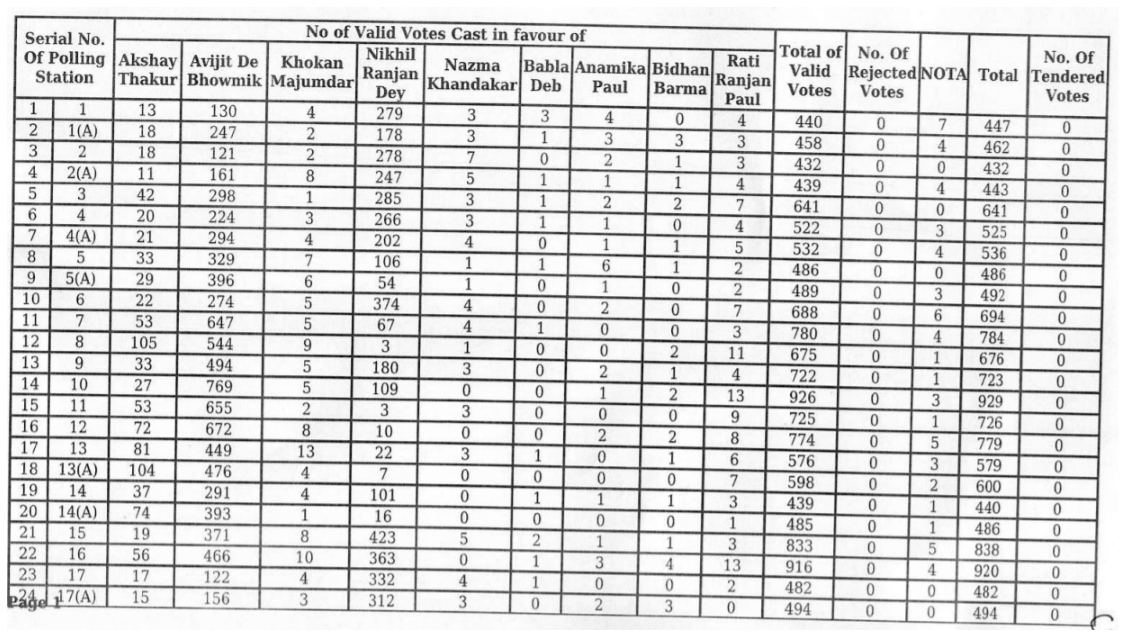

In [253]:
display('gray_image.jpg')

In [254]:
thresh, im_bw = cv2.threshold(gray_image,200,255, cv2.THRESH_BINARY)
cv2.imwrite('bw_image.jpg',im_bw)

True

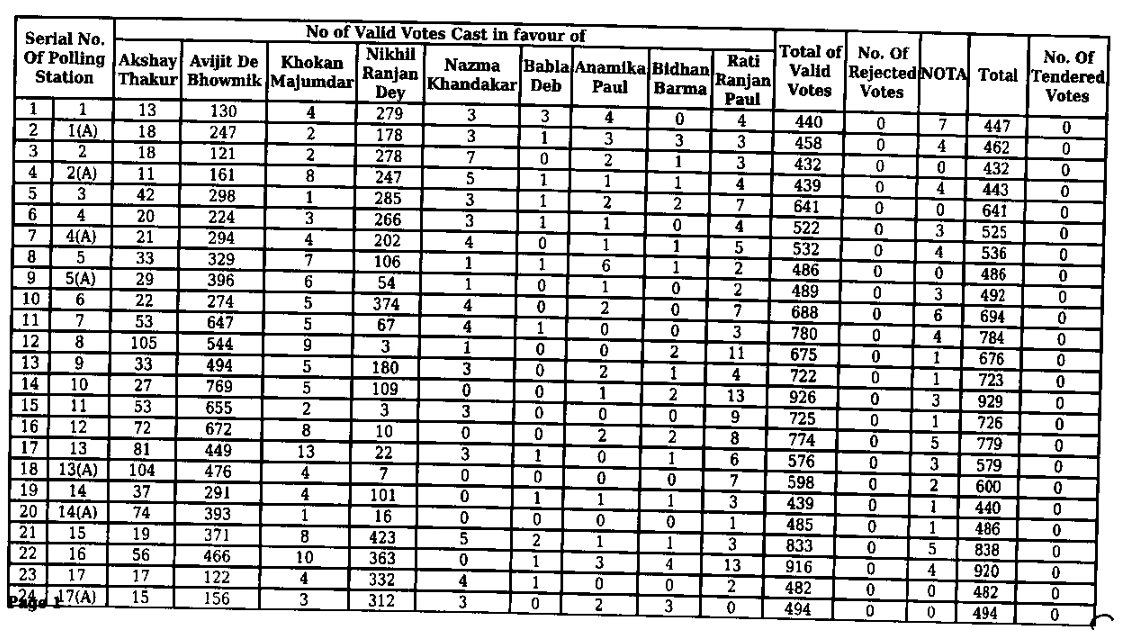

In [258]:
display('bw_image.jpg')
img=cv2.imread('bw_image.jpg')

In [256]:
# def noise_removal(image):
#     import numpy as np
#     kernel=np.ones((1,1), np.uint8)
#     image=cv2.dilate(image, kernel, iterations=1)
#     kernel=np.ones((1,1),np.uint8)
#     image=cv2.erode(image, kernel, iterations=1)
#     image=cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#     image=cv2.medianBlur(image,3)
#     return (image)

In [259]:
# no_noise=noise_removal(img)
# cv2.imwrite('no_noise.jpg',no_noise)
# display('no_noise.jpg')

#there is no noise in image so dont apply any transformation for it

In [264]:
# Calculate skew angle of an image
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=5)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    minAreaRect = cv2.minAreaRect(largestContour)

    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

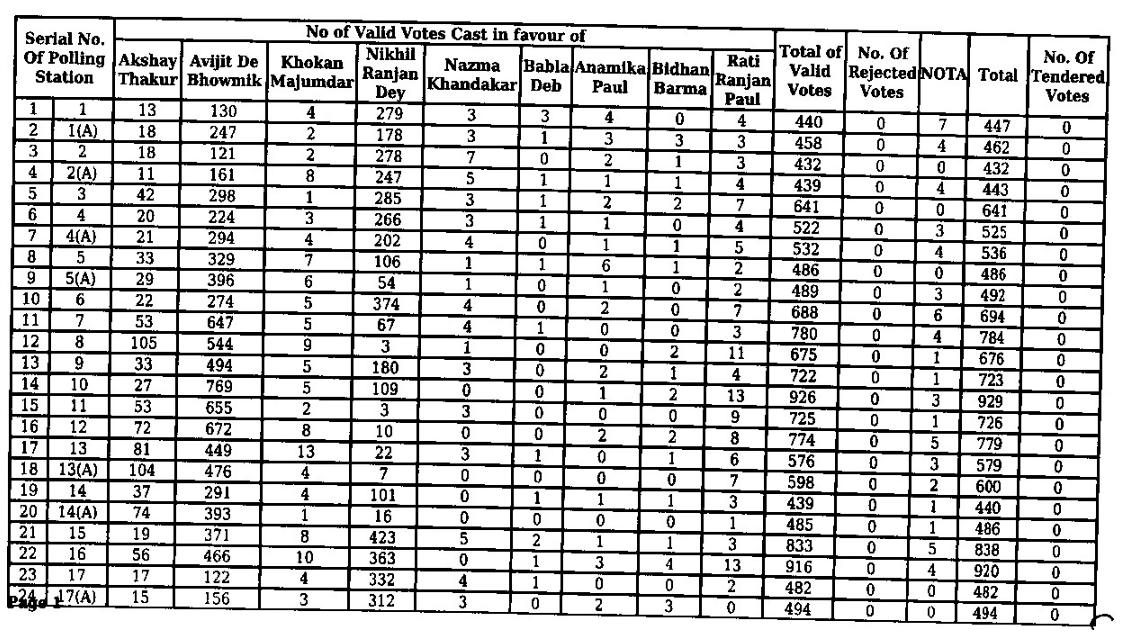

In [262]:
def thin_font(image):
    import numpy as np
    image=cv2.bitwise_not(image)
    kernel=np.ones((1,1),np.uint8)
    image=cv2.erode(image, kernel, iterations=1)
    image=cv2.bitwise_not(image)
    return (image)

eroded_image=thin_font(img)
cv2.imwrite('erroded_img.jpg',eroded_image)
display('erroded_img.jpg')

In [268]:
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [269]:
img=cv2.imread('erroded_img.jpg')
fixed=deskew(img)
cv2.imwrite('rotated_fixed.jpg',fixed)

True

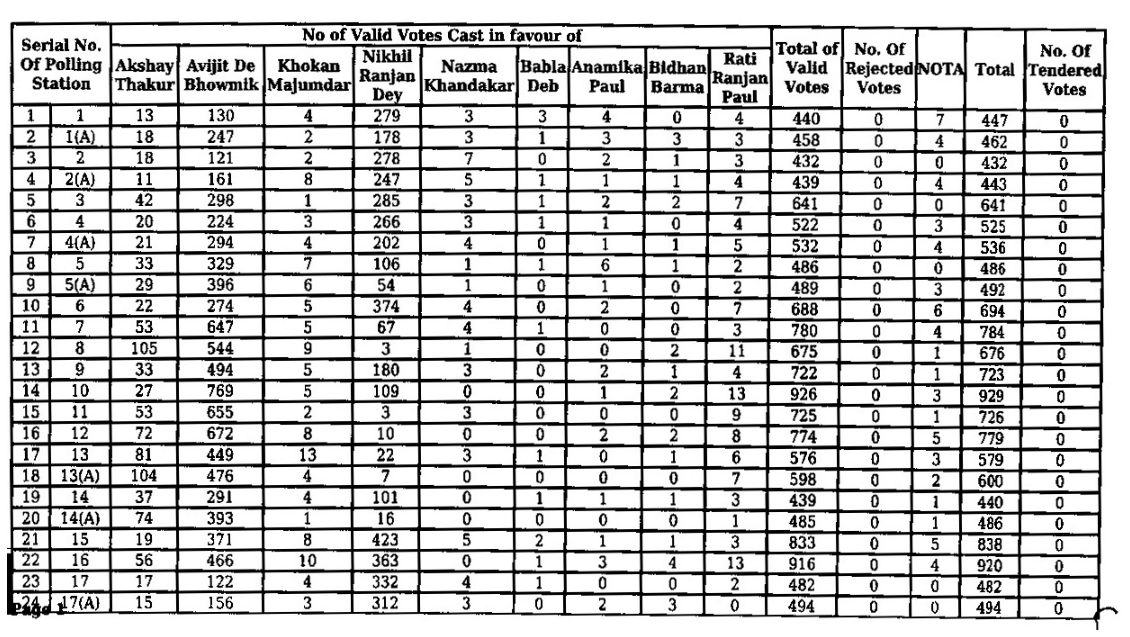

In [270]:
display('rotated_fixed.jpg')

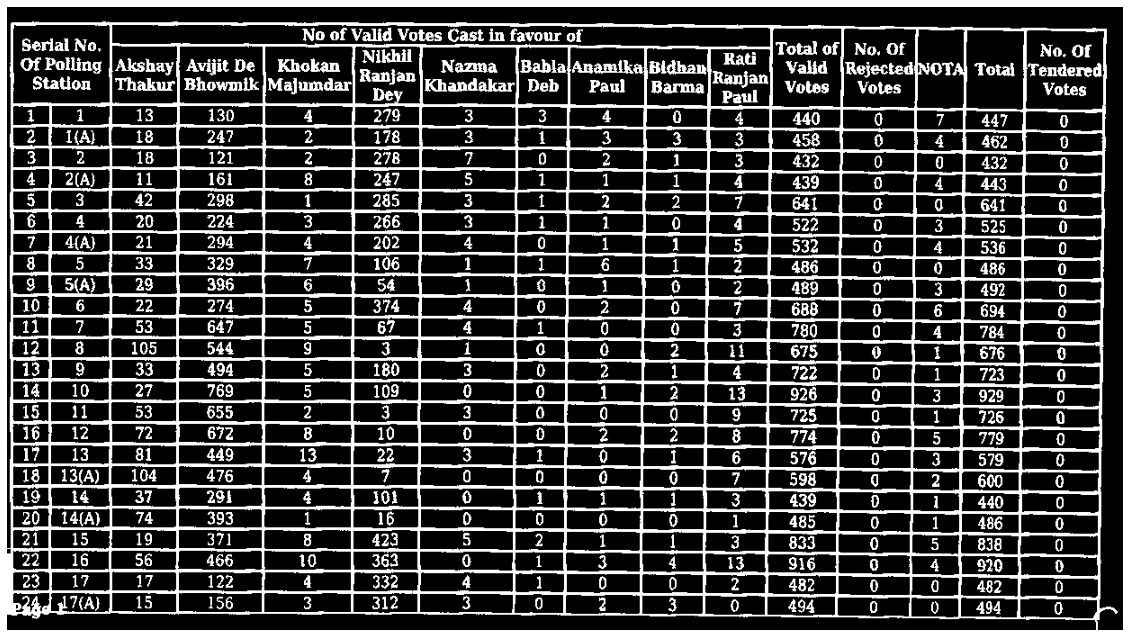

In [321]:
#read your file

file=r'rotated_fixed.jpg'
img = cv2.imread(file,0)
# img= pad_images_to_same_size(img)
# cv2.imwrite('padded_sample.jpg',img)
# display('padded_sample.jpg')
# print(img.shape[:2])


#thresholding the image to a binary image

thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('inverted_img.jpg',img_bin)
display('inverted_img.jpg')

# #Plotting the image to see the output
# plotting = plt.imshow(img_bin,cmap='gray')
# plt.show()

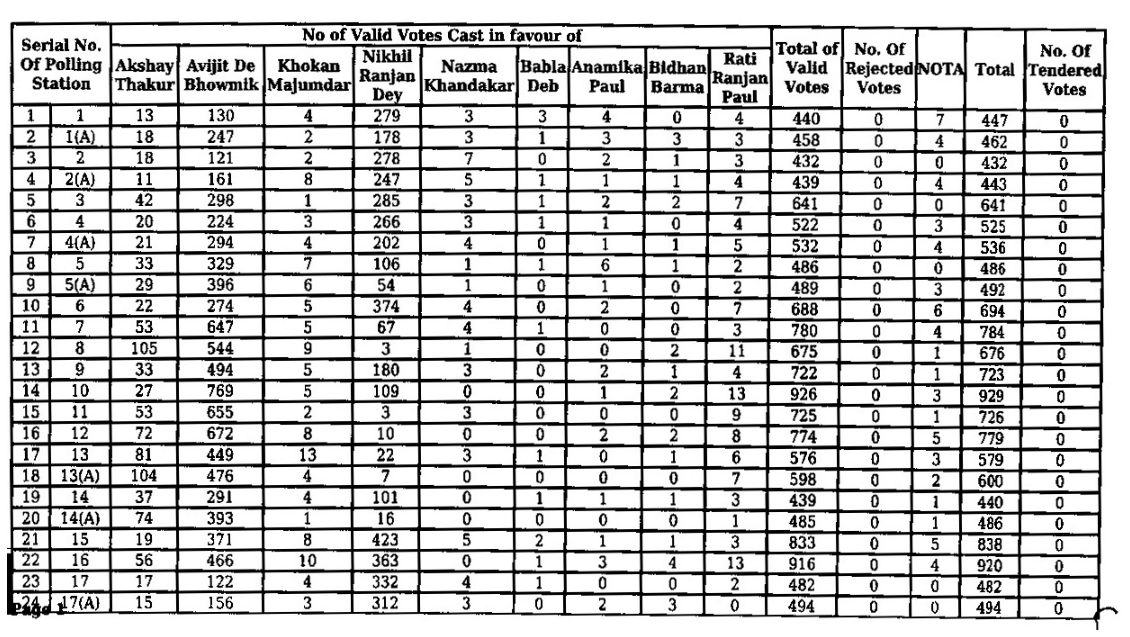

In [322]:
display('rotated_fixed.jpg')


In [323]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100

# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))

# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))

# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

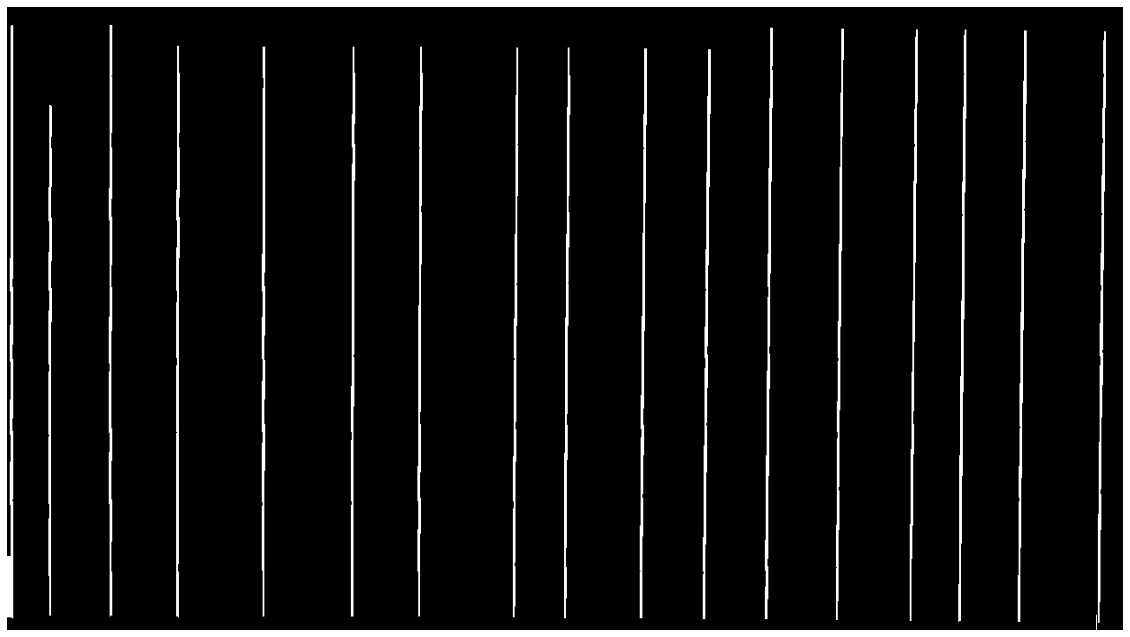

In [324]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("vertical_lines.jpg",vertical_lines)

# #Plot the generated image
# plotting = plt.imshow(image_1,cmap='gray')
# plt.show()
display("vertical_lines.jpg")

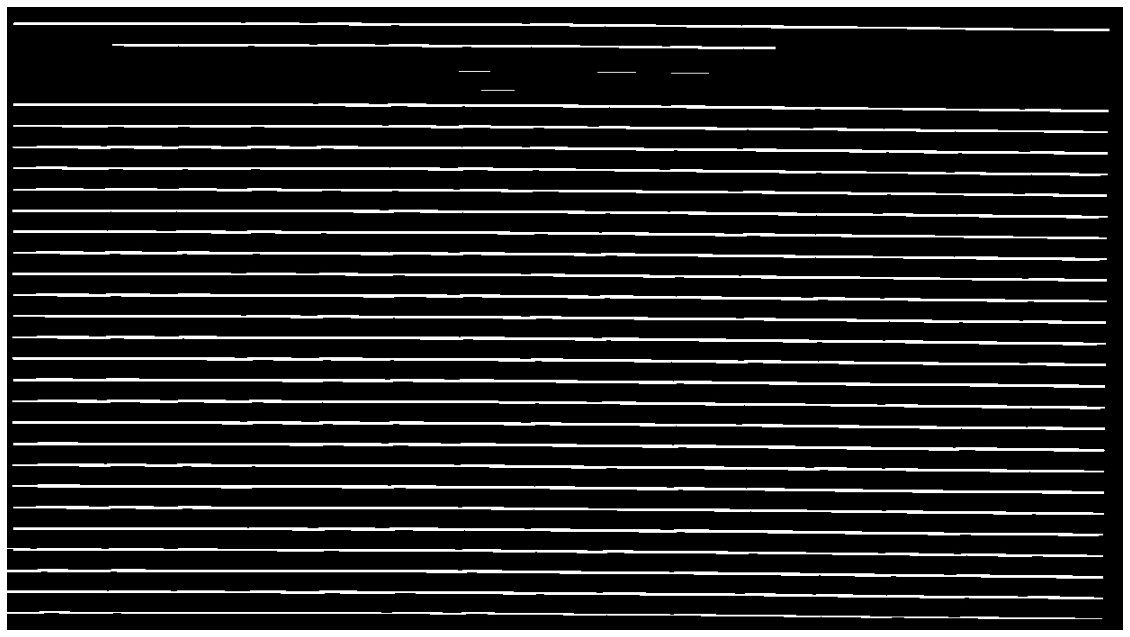

In [325]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg

image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("horizontal_lines.jpg",horizontal_lines)

#Plot the generated image

# plotting = plt.imshow(image_2,cmap='gray')
# plt.show()

display("horizontal_lines.jpg")

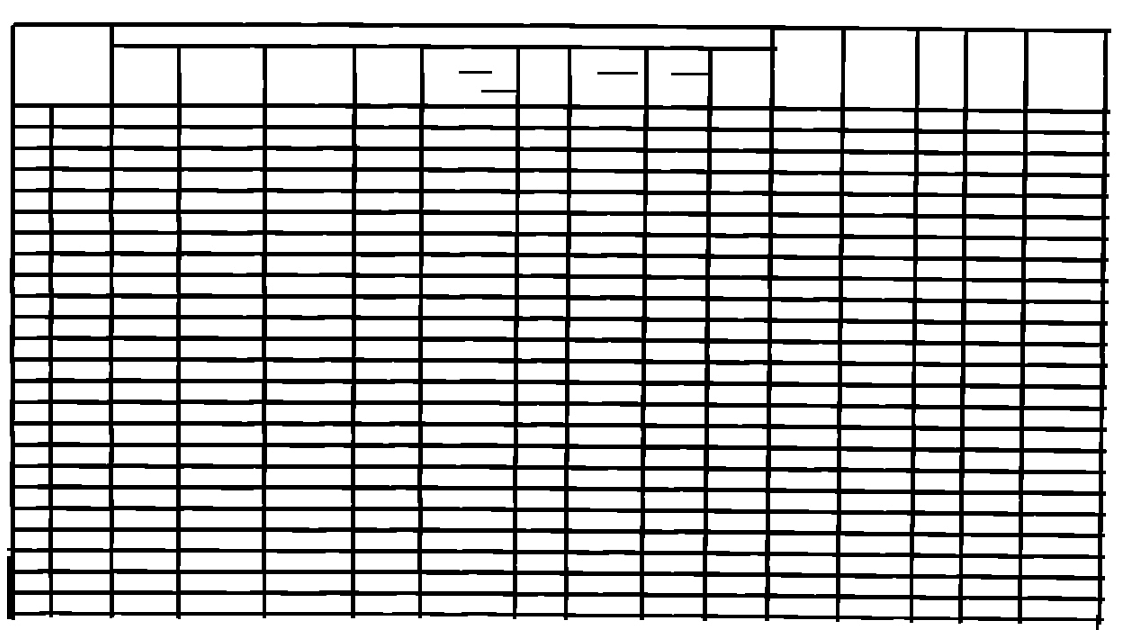

In [326]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)

#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("cells.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

# #Plotting the generated image
# plotting = plt.imshow(bitnot,cmap='gray')
# plt.show()

display('cells.jpg')


In [327]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [328]:
def sort_contours(cnts, method="left-to-right"):
    
     # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

       


In [281]:
# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")
boundingBoxes

((0, 0, 1240, 692),
 (119, 22, 729, 22),
 (9, 22, 105, 85),
 (931, 26, 79, 86),
 (852, 26, 75, 85),
 (1013, 27, 51, 86),
 (1134, 28, 85, 86),
 (1068, 28, 62, 86),
 (193, 45, 92, 62),
 (119, 45, 70, 62),
 (463, 46, 103, 62),
 (388, 46, 71, 62),
 (289, 46, 95, 62),
 (627, 47, 81, 62),
 (570, 47, 53, 61),
 (713, 48, 66, 62),
 (784, 49, 64, 61),
 (501, 70, 39, 5),
 (655, 71, 47, 5),
 (463, 112, 102, 20),
 (389, 112, 69, 20),
 (289, 112, 95, 19),
 (194, 112, 90, 19),
 (119, 112, 70, 19),
 (52, 112, 62, 19),
 (9, 112, 38, 19),
 (570, 113, 52, 19),
 (713, 114, 65, 19),
 (627, 114, 81, 19),
 (852, 115, 74, 20),
 (783, 115, 64, 19),
 (931, 116, 77, 19),
 (1067, 117, 62, 20),
 (1013, 117, 49, 19),
 (1134, 118, 83, 20),
 (193, 135, 91, 20),
 (118, 135, 71, 20),
 (51, 135, 63, 20),
 (9, 135, 38, 20),
 (570, 136, 52, 20),
 (463, 136, 102, 19),
 (388, 136, 70, 19),
 (289, 136, 94, 19),
 (627, 137, 80, 19),
 (712, 138, 66, 19),
 (852, 139, 74, 19),
 (783, 139, 64, 19),
 (930, 140, 79, 19),
 (1134, 14

In [329]:
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

#Get mean of heights
mean = np.mean(heights)

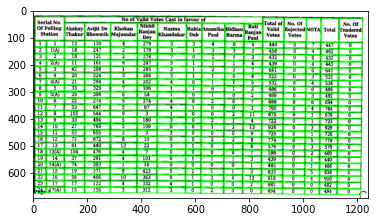

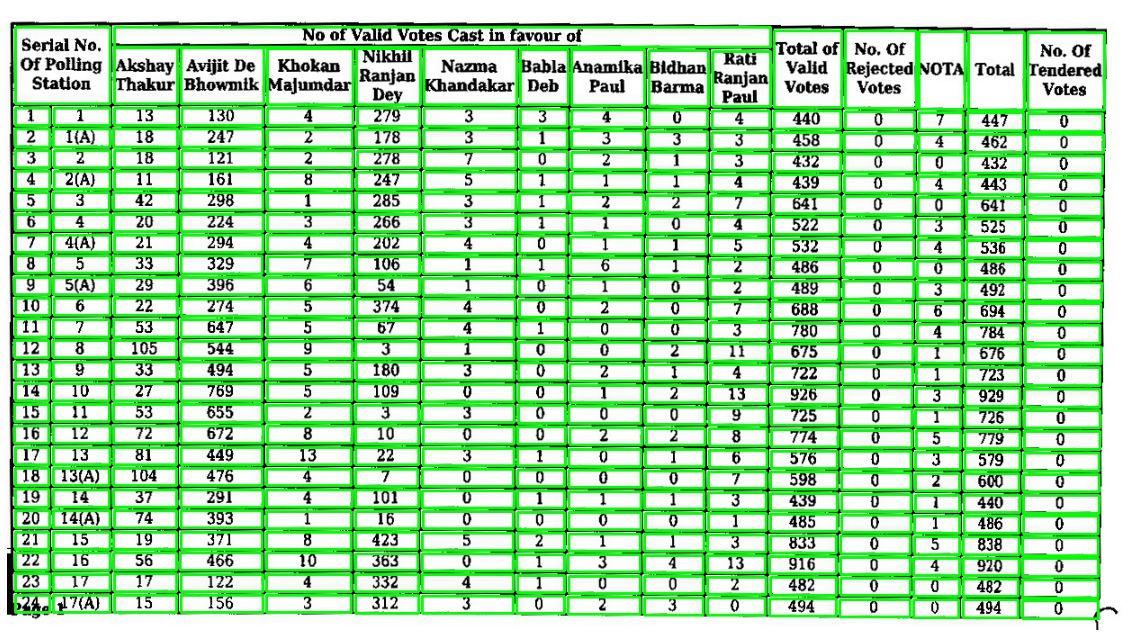

In [330]:
img=cv2.imread('rotated_fixed.jpg')
#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (10<w<1000 and 5<h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
    
plotting = plt.imshow(image,cmap='gray')
plt.show()


# img= Image.fromarray(image)
cv2.imwrite("text_in_box.jpg",img )
display("text_in_box.jpg")



In [331]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
print(column)
print('\n')
print(row)

[[1128, 659, 84, 20], [1062, 658, 61, 20], [1007, 658, 50, 20], [925, 658, 78, 19], [847, 657, 74, 19], [778, 656, 64, 19], [708, 656, 65, 19], [623, 655, 80, 19], [566, 654, 53, 19], [461, 654, 101, 19], [387, 653, 70, 20], [288, 653, 94, 19], [193, 653, 91, 19], [119, 653, 69, 19], [51, 653, 63, 19], [9, 653, 38, 19], [1128, 636, 84, 20], [1062, 635, 61, 19], [1007, 635, 51, 19], [926, 634, 77, 19], [848, 633, 73, 20], [778, 633, 65, 19], [708, 632, 65, 19], [624, 632, 79, 19], [567, 631, 52, 19], [461, 630, 101, 19], [387, 630, 70, 19], [288, 630, 94, 19], [193, 630, 91, 19], [51, 630, 63, 18], [119, 629, 69, 20], [9, 629, 38, 19], [1128, 612, 84, 20], [1062, 612, 62, 19], [1007, 612, 51, 19], [926, 611, 77, 19], [847, 610, 74, 19], [778, 609, 64, 19], [708, 609, 65, 19], [623, 608, 80, 19], [566, 608, 53, 18], [461, 607, 101, 19], [387, 607, 69, 18], [288, 606, 94, 19], [192, 606, 91, 19], [118, 606, 70, 19], [51, 606, 63, 19], [9, 606, 37, 19], [1128, 589, 84, 20], [1062, 588, 62,

In [332]:
#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [333]:
#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

In [334]:
#Regarding the distance to the columns center, the boxes are arranged in respective order
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

In [335]:
#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

In [336]:
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")


                                                 0   1   2   3   4   5   6    \
0      21\n   18\n       117\n   ...                           

  7   8   9    ... 390 391 392 393 394 395 396 397 398 399  
0              ...                                          

[1 rows x 400 columns]


In [315]:
#Converting it in a csv-file
dataframe.to_csv('output.csv')

In [337]:
df=pd.read_csv('output.csv')
df

Unnamed: 0                                      0            1  \
0            0   Serial No,\nOf Polling ,\nStation\n
                
1            1                                                       
2            2                                      
        _|\n
   
3            3                                      
            
   
4            4                                      
            
   
5            5                                      
            
   
6            6                                      
            
   
7            7                                      
            
   
8            8                                      
      4(A}\n
   
9            9                                      
            
   
10          10                                      
            
   
11          11                                      
            
   
12          12                                 117\n
            
   
13          13                                      
            
   
14          14                                      
            
   
15          15                                      
            
   
16          16                                      
       Tie\n
   
17          17                                      
        12\n
   
18          18                                      
        13\n
   
19          19                                  18\n
    13fA)_\n
   
20          20                                      
        14\n
   
21          21                                      
   T4{A) |\n
   
22          22                                  21\n
       15:\n
   
23          23                                      
            
   
24          24                                      
      17 |\n
   
25          25                                      
      Uta)\n
   

                           2                        3  \
0                                                       
1     \n\nAkshay|\nThakur\n
   Avijit De\nBhowmik.\n
   
2                      13\n
               — 130 |\n
   
3                   “18 |\n
                   247\n
   
4                          
             _ 121 __|\n
   
5                     “ah\n
                ~ 161i\n
   
6                          
                        
   
7                    20 |\n
                 224 |\n
   
8                      21\n
                        
   
9                      33\n
                   329\n
   
10                         
                   396\n
   
11                   — 22\n
                   274\n
   
12                         
                   647\n
   
13                    105\n
                   544\n
   
14                         
                        
   
15                    27°\n
                   769\n
   
16                     53\n
                        
   
17                  |__72\n
                        
   
18                     81\n
                   449\n
   
19                    104\n
                 _ 476\n
   
20                         
                        
   
21                         
                        
   
22                     19\n
                        
   
23                         
               | 466 —\n
   
24                   17 |\n
                   122\n
   
25                     15\n
                — 156,\n
   

                                               4                          5  \
0     \n\nNo of Valid Votes Cast in favour of\n
                              
1                          Khokan |\nMajumdar\n
   Nikhil\nRanjan\nDey .\n
   
2                                              
                          
   
3                                              
                          
   
4                                              
                     278\n
   
5                                              
                   | 247\n
   
6                   

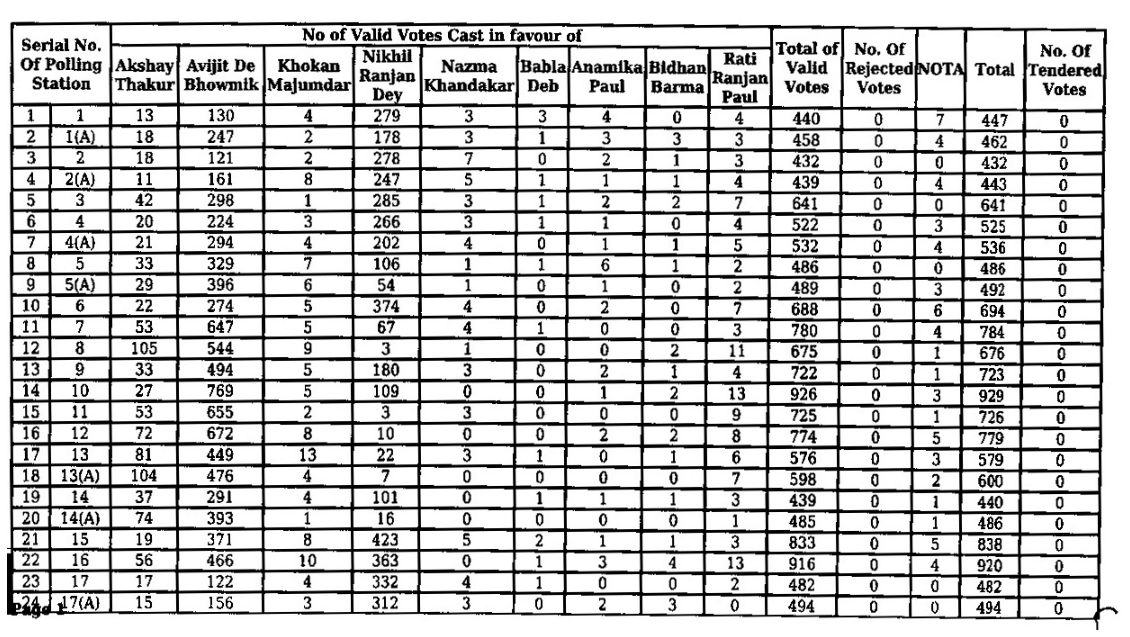

In [338]:
display('rotated_fixed.jpg')